# Time Series Data Analysis and Future Prediction: Part II

In first part I did some expoloratory data analysis using time series data.
Here I am going to analyze data using zipcode 78717 only and finally will do future prediction.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

//anaconda/envs/python3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
##Data is from 2010-11-30 to 2017-05-30
df = pd.read_csv('ZILLOW-Z78717_ZRIFAH.csv')

In [3]:
df.columns = ['Month', 'Price']

In [4]:
df['Month'] = pd.to_datetime(df['Month'])

In [5]:
df.set_index('Month', inplace=True)

In [6]:
df.head()

,Price
Month,
2017-05-31,0.806
2017-04-30,0.806
2017-03-31,0.804
2017-02-28,0.804
2017-01-31,0.808


In [7]:
df = df.sort_index(axis=0, ascending=True)

In [8]:
df.head()

,Price
Month,
2010-11-30,0.662
2010-12-31,0.668
2011-01-31,0.672
2011-02-28,0.678
2011-03-31,0.678


In [9]:
df.tail()

,Price
Month,
2017-01-31,0.808
2017-02-28,0.804
2017-03-31,0.804
2017-04-30,0.806
2017-05-31,0.806


In [10]:
df.index

DatetimeIndex(['2010-11-30', '2010-12-31', '2011-01-31', '2011-02-28',
               '2011-03-31', '2011-04-30', '2011-05-31', '2011-06-30',
               '2011-07-31', '2011-08-31', '2011-09-30', '2011-10-31',
               '2011-11-30', '2011-12-31', '2012-01-31', '2012-02-29',
               '2012-03-31', '2012-04-30', '2012-05-31', '2012-06-30',
               '2012-07-31', '2012-08-31', '2012-09-30', '2012-10-31',
               '2012-11-30', '2012-12-31', '2013-01-31', '2013-02-28',
               '2013-03-31', '2013-04-30', '2013-05-31', '2013-06-30',
               '2013-07-31', '2013-08-31', '2013-09-30', '2013-10-31',
               '2013-11-30', '2013-12-31', '2014-01-31', '2014-02-28',
               '2014-03-31', '2014-04-30', '2014-05-31', '2014-06-30',
               '2014-07-31', '2014-08-31', '2014-09-30', '2014-10-31',
               '2014-11-30', '2014-12-31', '2015-01-31', '2015-02-28',
               '2015-03-31', '2015-04-30', '2015-05-31', '2015-06-30',
      

In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Price,79.0,0.759722,0.053577,0.662,0.709,0.768,0.811,0.828


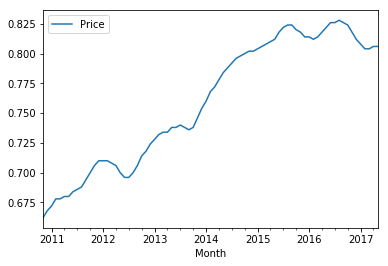

In [12]:
df.plot()

In [13]:
time_series = df['Price']

In [14]:
type(time_series)

pandas.core.series.Series

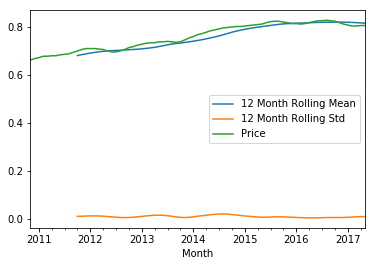

In [15]:
time_series.rolling(12).mean().plot(label='12 Month Rolling Mean')
time_series.rolling(12).std().plot(label='12 Month Rolling Std')
time_series.plot()
plt.legend();

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [17]:
decomp = seasonal_decompose(time_series)

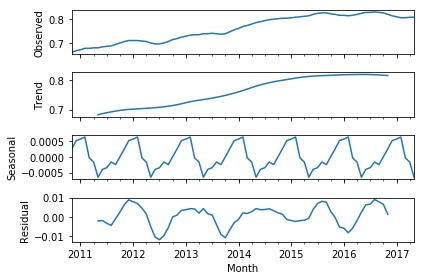

In [18]:
fig=decomp.plot()

# Check data is stationary or not ?

In [19]:
from statsmodels.tsa.stattools import adfuller

In [20]:
result = adfuller(df['Price'])

In [21]:
def adf_check(time_series):
    result = adfuller(time_series)
    print('Augmented Dicky-Fuller Test')
    labels = ['ADF Test Statistics', 'p-value', '# of lags', 'No. of observations used']
    
    for value,label in zip(result, labels):
        print(label+ ":" +str(value))
        
    if result[1] <= 0.05:
        print('Strong evidence against null hypothesis')
        print('Reject null hypothesis')
        print('Data has no unit root and is stationary')
    else:
        print('Weak evidence against null hypothesis')
        print('Fail to reject null hypothesis')
        print('Data has unit root and in not stationary')
    

In [22]:
adf_check(df['Price'])

Augmented Dicky-Fuller Test
ADF Test Statistics:-1.52130634663
p-value:0.522946303181
# of lags:9
No. of observations used:69
Weak evidence against null hypothesis
Fail to reject null hypothesis
Data has unit root and in not stationary


In [23]:
df['Price First Difference'] = df['Price'] - df['Price'].shift(1)

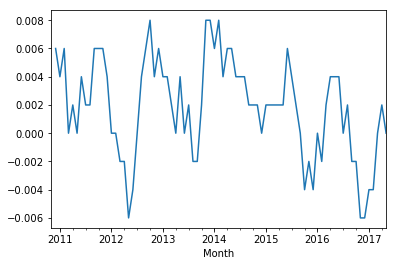

In [24]:
df['Price First Difference'].plot()

In [25]:
adf_check(df['Price First Difference'].dropna())

Augmented Dicky-Fuller Test
ADF Test Statistics:-1.26105439672
p-value:0.646796398286
# of lags:8
No. of observations used:69
Weak evidence against null hypothesis
Fail to reject null hypothesis
Data has unit root and in not stationary


In [26]:
df['Price Second Difference'] = df['Price First Difference'] - df['Price First Difference'].shift(1)

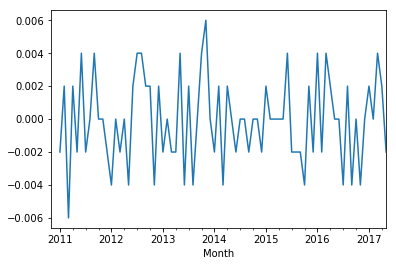

In [27]:
df['Price Second Difference'].plot()

In [28]:
adf_check(df['Price Second Difference'].dropna())

Augmented Dicky-Fuller Test
ADF Test Statistics:-4.82456439471
p-value:4.87970426791e-05
# of lags:11
No. of observations used:65
Strong evidence against null hypothesis
Reject null hypothesis
Data has no unit root and is stationary


# Let's do seasonal difference and check

In [29]:
df['Price Seasonal Difference'] = df['Price'] - df['Price'].shift(12)

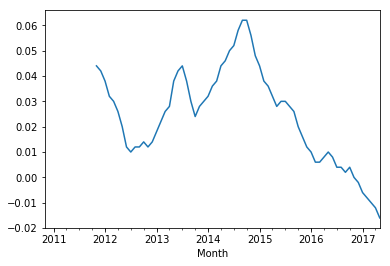

In [30]:
df['Price Seasonal Difference'].plot()

In [31]:
adf_check(df['Price Seasonal Difference'].dropna())

Augmented Dicky-Fuller Test
ADF Test Statistics:-0.078520011379
p-value:0.95153643837
# of lags:10
No. of observations used:56
Weak evidence against null hypothesis
Fail to reject null hypothesis
Data has unit root and in not stationary


Now do Seasonal Difference by taking price first difference data

In [32]:
df['Price Seasonal First Difference'] = df['Price First Difference'] - df['Price First Difference'].shift(12)

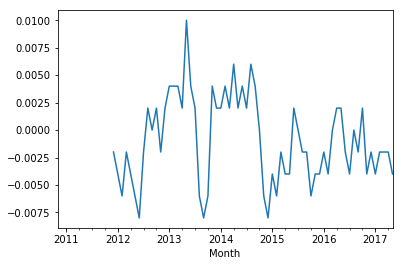

In [33]:
df['Price Seasonal First Difference'].plot()

In [34]:
adf_check(df['Price Seasonal First Difference'].dropna())

Augmented Dicky-Fuller Test
ADF Test Statistics:-2.39456563573
p-value:0.14327609618
# of lags:9
No. of observations used:56
Weak evidence against null hypothesis
Fail to reject null hypothesis
Data has unit root and in not stationary


In [35]:
df['Price Seasonal Second Difference'] = df['Price Second Difference'] - df['Price Second Difference'].shift(12)

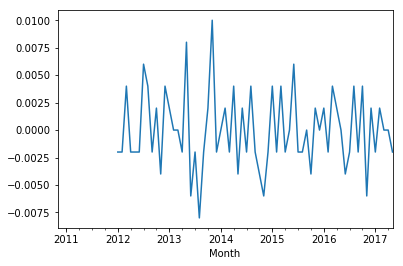

In [36]:
df['Price Seasonal Second Difference'].plot()

In [37]:
adf_check(df['Price Seasonal Second Difference'].dropna())

Augmented Dicky-Fuller Test
ADF Test Statistics:-4.35412735715
p-value:0.000357517499368
# of lags:11
No. of observations used:53
Strong evidence against null hypothesis
Reject null hypothesis
Data has no unit root and is stationary


# Now do some autocorrelatio and partial autocorrelatio plot on    our different data sets created above.

In [38]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

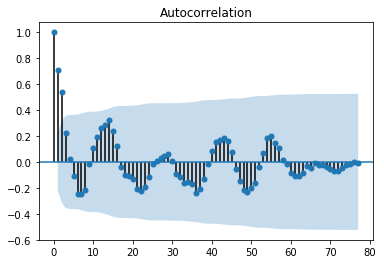

In [39]:
fig_First = plot_acf(df['Price First Difference'].dropna())

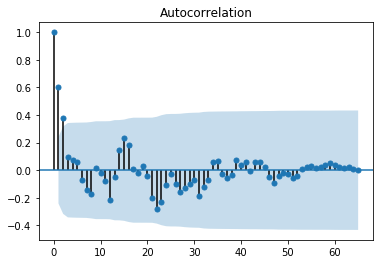

In [40]:
fig_Seasonal_First = plot_acf(df['Price Seasonal First Difference'].dropna())

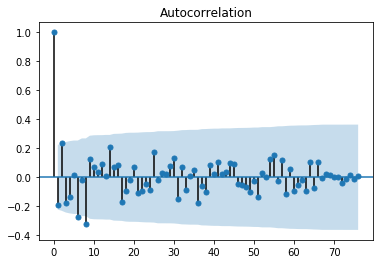

In [41]:
fig_Second = plot_acf(df['Price Second Difference'].dropna())

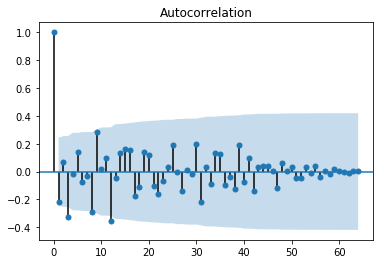

In [42]:
fig_Seasonal_Second = plot_acf(df['Price Seasonal Second Difference'].dropna())

This also can be done using pandas plotting function.

In [43]:
from pandas.plotting import autocorrelation_plot

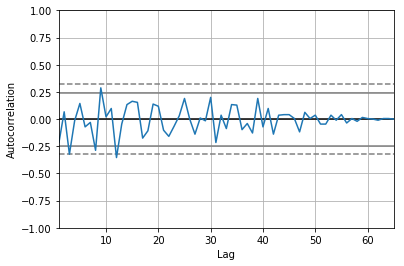

In [44]:
autocorrelation_plot(df['Price Seasonal Second Difference'].dropna())

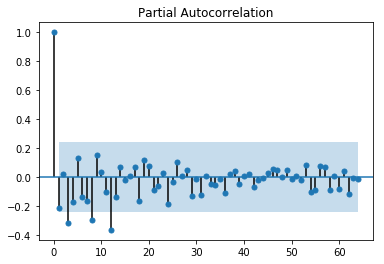

In [45]:
fig_Seasonal_second_pacf = plot_pacf(df['Price Seasonal Second Difference'].dropna())

# Now use the ARIMA model for future prediction. We see that      our data is seasonal so we need to use seasonal ARIMA model.

In [46]:
from statsmodels.tsa.arima_model import ARIMA

In [47]:
model = sm.tsa.statespace.SARIMAX(df['Price'], order=(0,1,0), seasonal_order=(1,1,1,12))

In [48]:
results = model.fit()

In [49]:
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                              Price   No. Observations:                   79
Model:             SARIMAX(0, 1, 0)x(1, 1, 1, 12)   Log Likelihood                 271.732
Date:                            Mon, 02 Oct 2017   AIC                           -537.463
Time:                                    12:53:54   BIC                           -530.355
Sample:                                11-30-2010   HQIC                          -534.615
                                     - 05-31-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.5636      0.538     -1.048      0.295      -1.618       0.490
ma.S.L12       0.3787      0.591   

# Now plot the residual of the model

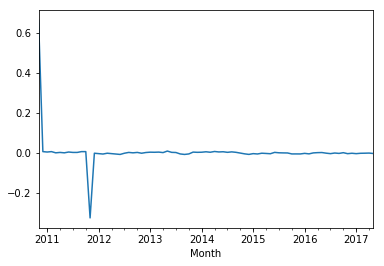

In [50]:
results.resid.plot()

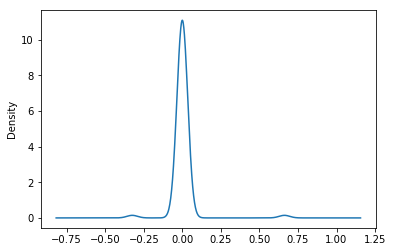

In [51]:
results.resid.plot(kind='kde')

# Lets do forcast using this model: 

We have 79 data points so forcast the data points start from 50 and ends at 79:

In [52]:
df['Forcast'] = results.predict(start=50, end = 79)

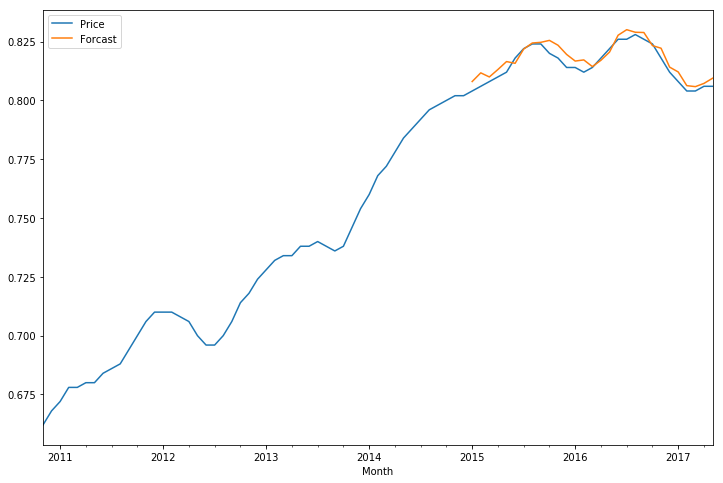

In [53]:
df[['Price', 'Forcast']].plot(figsize=(12,8))

# Now do future prediction: 

we can not increase end value only but we need to increase the time series data in our original data with empty Price column for that time. Lets do forcast of housing price until 04-30-2019.

In [54]:
df.tail()

,Price,Price First Difference,Price Second Difference,Price Seasonal Difference,Price Seasonal First Difference,Price Seasonal Second Difference,Forcast
Month,,,,,,,
2017-01-31,0.808,-0.004,2.000000e-03,-0.006,-0.004,-2.000000e-03,0.812094
2017-02-28,0.804,-0.004,2.220446e-16,-0.008,-0.002,2.000000e-03,0.806279
2017-03-31,0.804,0.000,4.000000e-03,-0.010,-0.002,-1.110223e-16,0.805856
2017-04-30,0.806,0.002,2.000000e-03,-0.012,-0.002,0.000000e+00,0.807228
2017-05-31,0.806,0.000,-2.000000e-03,-0.016,-0.004,-2.000000e-03,0.809423


In [55]:
from pandas.tseries.offsets import DateOffset

In [56]:
future_dates = [df.index[-1] + DateOffset(months=x) for x in range(1,24)]

In [57]:
future_dates

[Timestamp('2017-06-30 00:00:00'),
 Timestamp('2017-07-31 00:00:00'),
 Timestamp('2017-08-31 00:00:00'),
 Timestamp('2017-09-30 00:00:00'),
 Timestamp('2017-10-31 00:00:00'),
 Timestamp('2017-11-30 00:00:00'),
 Timestamp('2017-12-31 00:00:00'),
 Timestamp('2018-01-31 00:00:00'),
 Timestamp('2018-02-28 00:00:00'),
 Timestamp('2018-03-31 00:00:00'),
 Timestamp('2018-04-30 00:00:00'),
 Timestamp('2018-05-31 00:00:00'),
 Timestamp('2018-06-30 00:00:00'),
 Timestamp('2018-07-31 00:00:00'),
 Timestamp('2018-08-31 00:00:00'),
 Timestamp('2018-09-30 00:00:00'),
 Timestamp('2018-10-31 00:00:00'),
 Timestamp('2018-11-30 00:00:00'),
 Timestamp('2018-12-31 00:00:00'),
 Timestamp('2019-01-31 00:00:00'),
 Timestamp('2019-02-28 00:00:00'),
 Timestamp('2019-03-31 00:00:00'),
 Timestamp('2019-04-30 00:00:00')]

In [58]:
future_df = pd.DataFrame(index = future_dates, columns=df.columns)

In [59]:
future_df

,Price,Price First Difference,Price Second Difference,Price Seasonal Difference,Price Seasonal First Difference,Price Seasonal Second Difference,Forcast
2017-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
final_df = pd.concat([df,future_df])

In [61]:
final_df.head()

,Price,Price First Difference,Price Second Difference,Price Seasonal Difference,Price Seasonal First Difference,Price Seasonal Second Difference,Forcast
2010-11-30,0.662,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-31,0.668,0.006,NaN,NaN,NaN,NaN,NaN
2011-01-31,0.672,0.004,-0.002,NaN,NaN,NaN,NaN
2011-02-28,0.678,0.006,0.002,NaN,NaN,NaN,NaN
2011-03-31,0.678,0.000,-0.006,NaN,NaN,NaN,NaN


In [62]:
final_df.tail()

,Price,Price First Difference,Price Second Difference,Price Seasonal Difference,Price Seasonal First Difference,Price Seasonal Second Difference,Forcast
2018-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
final_df['Forcast'] = results.predict(start = 79, end = 103)

In [64]:
final_df.tail()

,Price,Price First Difference,Price Second Difference,Price Seasonal Difference,Price Seasonal First Difference,Price Seasonal Second Difference,Forcast
2018-12-31,NaN,NaN,NaN,NaN,NaN,NaN,0.784429
2019-01-31,NaN,NaN,NaN,NaN,NaN,NaN,0.780736
2019-02-28,NaN,NaN,NaN,NaN,NaN,NaN,0.776851
2019-03-31,NaN,NaN,NaN,NaN,NaN,NaN,0.777037
2019-04-30,NaN,NaN,NaN,NaN,NaN,NaN,0.779326


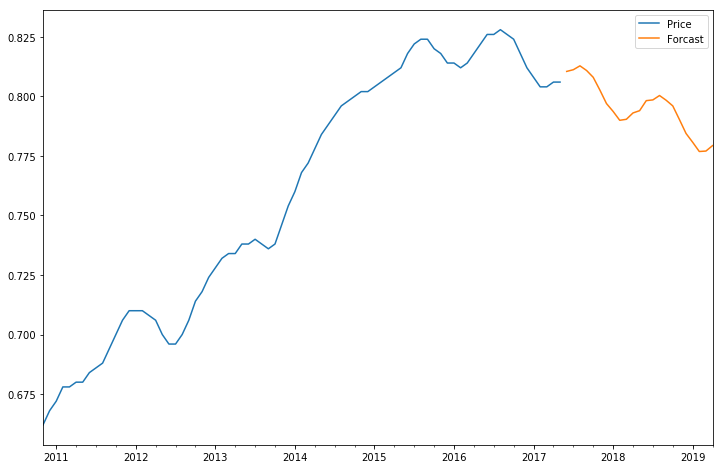

In [65]:
final_df[['Price','Forcast']].plot(figsize=(12,8))

# Finally I finished the housing price analysis in         Austin(zipcode=78717, Avery Ranch Area).